In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

dataset_name = "music4all"
dataset_relative_location = "../../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

datasets = {}

csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

# Taking a look at the datasets we have
datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

In [92]:
sns.set_theme()

In [43]:
df_with_disruption = pd.read_csv(Path("../dataset") / "output" / "csv_with_disruption" / "song_info_with_disruption_26638_feat_transfer_learning_gamma_0.1.csv")
df_with_disruption = df_with_disruption.drop(columns=["Unnamed: 0", "index", "mapping_to_fv_index"])

In [44]:
df_with_disruption.describe()

,ni,nj,nk,disruption,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
count,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,2.663800e+04
mean,3.648322,173.190930,40277.665253,0.045297,35.894061,1987.128726,0.510218,0.645525,5.262069,0.682746,0.517584,121.525701,2.470610e+05
std,20.796476,284.287228,56961.777460,0.223790,14.963367,11.501414,0.170381,0.242783,3.547412,0.465416,0.258485,28.539917,9.540137e+04
min,0.000000,0.000000,0.000000,-1.000000,0.000000,1923.000000,0.000000,0.000685,0.000000,0.000000,0.000000,0.000000,3.030700e+04
25%,0.000000,10.000000,2062.250000,-0.006648,25.000000,1979.000000,0.386000,0.471000,2.000000,0.000000,0.305000,100.002000,1.916000e+05
50%,0.000000,59.000000,14515.500000,-0.003236,35.000000,1990.000000,0.517000,0.679000,5.000000,1.000000,0.520000,119.875000,2.357800e+05
75%,1.000000,211.000000,55556.500000,-0.001721,46.000000,1997.000000,0.635000,0.856000,9.000000,1.000000,0.731000,138.551000,2.838662e+05
max,894.000000,3544.000000,386389.000000,1.000000,80.000000,2002.000000,0.988000,1.000000,11.000000,1.000000,0.998000,242.903000,2.703227e+06


## Artistas Mais Disruptivos até 2002

Para analisar os artistas mais disruptivos primeiro temos que levar em conta alguns fatores importantes.


Alguns artistas vão estar mais bem representados que outros, já que é um base de dados feita a partir do spotify.

Ou seja, somente somar os valores das disrupções vai favorecer muito artistas mais predominantes. 


Por isso seria interessante normalizar esses valores para estarem relacionados a predominância dos mesmos no conjunto de dados, 

por isso a soma da disrupção é dividida pela número de músicas de um artista. 


Um álbum é considerado um album se possui 6 ou mais músicas, olhando para o conjunto de dados, 

a quantidade média de músicas de cada artista fica um pouco maior que este número 6.5. 

Logo selecionaremos os artistas que tem pelo menos um album no conjunto de dados e tiraremos a média da disrupção pelo seu número de músicas.


In [61]:
df_with_disruption.groupby(['artist'])["song"].count().mean()

6.577283950617284

## Artistas Mais Disruptivos (Utilizando a média)

In [98]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['mean'], ascending=False)[:15]

,sum,count,mean
artist,,,
Robert Johnson,8.604167,11,0.782197
Sarah Vaughan,6.980488,9,0.775610
Wings,2.978442,6,0.496407
John Fahey,2.968913,6,0.494819
Miles Davis,17.569246,37,0.474844
Orbital,2.998299,7,0.428328
B.B. King,4.966161,12,0.413847
Thelonious Monk,4.882088,12,0.406841
Renaissance,3.964936,10,0.396494


Text(0.5, 1.0, 'Artistas mais disruptivos até 2002')

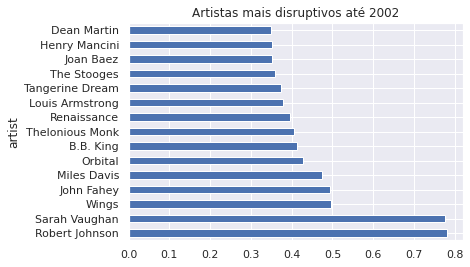

In [123]:
df_with_disruption.groupby(['artist'])['disruption'] \
    .agg(['sum', 'count', 'mean']).query("count >= 6") \
    .sort_values(by=['mean'], ascending=False)["mean"][:15].plot.barh(order=) \
    .set_title("Artistas mais disruptivos até 2002")


# Quem foram esses artistas ?

Robert Leroy Johnson (Hazlehurst, Mississippi, 8 de maio de 1911 – Greenwood, Mississippi, 16 de agosto de 1938) :
- Foi um cantor, compositor e guitarrista norte-americano de blues. Johnson é um dos músicos mais influentes do Mississippi Delta Blues e é uma importante referência para a padronização do consagrado formato de doze compassos para o blues


Sarah Lois Vaughan (Newark, 27 de março de 1924 – Los Angeles, 3 de abril de 1990):
- Foi uma cantora estadunidense de jazz, descrita por Scott Yanow como "uma das vozes mais maravilhosas do século XX". A voz de Vaughan caracterizava-se por sua tonalidade grave, por sua enorme versatilidade e por seu controle do vibrato. 
Sarah Vaughan foi uma das primeiras vocalistas a incorporar o fraseio do bebop.


Miles Davis
- Considerado um dos mais influentes músicos do século XX, Davis esteve na vanguarda de quase todos os desenvolvimentos do jazz desde a Segunda Guerra Mundial até a década de 1990. Ele participou de várias gravações do bebop e das primeiras gravações do cool jazz. Foi parte do desenvolvimento do jazz modal, e também do jazz fusion que originou-se do trabalho dele com outros músicos no final da década de 1960 e no começo da década de 1970.

B. B. King
- Ao longo da sua carreira, B.B. King foi distinguido com 15 prémios Grammy, tendo sido o criador de um estilo musical único e que faria dele um dos músicos mais respeitados e influentes de blues, tendo ganho o epíteto de Rei dos Blues.[1]

Renaissance 
- É uma banda de rock progressivo do Reino Unido popular nos anos 1970. Considerada uma das melhores bandas progressivas nesse período ao lado de Yes, Pink Floyd, Genesis, Camel, Focus, Eloy e Gentle Giant.

Tangerine
- Tangerine Dream é uma banda alemã, formada em 1967 por Edgar Froese, considerada como um grande expoente do rock progressivo eletrônico, junto com o Kraftwerk

The Stooges
- The Stooges (também conhecido como Iggy and The Stooges) foi uma banda de proto-punk norte-americana formada no final dos anos 60.

Joan Baez
- Joan Chandos Baez (Staten Island, 9 de janeiro de 1941) é uma cantora norte-americana de música folk, conhecida por seu estilo vocal distinto e opiniões políticas apresentadas abertamente.

Henry Mancini 
- Henry Mancini foi um dos compositores de trilhas cuja importância reside em ter aberto um divisor de águas na História da Música para o Cinema, ao colocar o chamado mainstream jazz na trilha do filme A Touch of Evil / A Marca da Maldade, dirigido em 1958 por Orson Welles.

Giorgio Moroder
- É um produtor e compositor musical italiano que inovou a chamada música disco com o massivo uso de sintetizadores, no final dos anos 70, abrindo caminho para o que mais tarde se tornou a dance music eletrônica.

Herbie Hancock
- Considerado um dos mestres do jazz, tocou ao lado de grandes músicos, com destaque para sua colaboração com Miles Davis nos anos 60, em um quinteto que se tornou antológico na história do Jazz. Ali, Hancock foi introduzido ao piano elétrico Fender Rhodes, ao qual adaptou-se imediatamente e tão logo experimentou a improvisada adaptação de um pedal de wah-wah e uma câmara de eco (um Echoplex). Harold Rhodes, pai do piano elétrico, ao noticiar essas estranhas e até então originais conexões, providencia para que esses conectores constem em todos os novos modelos deste piano.

Silver Apples 
- Foi uma dupla estado-unidense de música eletrônica e psicodélica formada em Nova Iorque, composta por Simeon Coxe III no sintetizador e Danny Taylor na bateria. O grupo esteve ativo entre 1967 e 1969, antes de ser reformado em meados da década de 1990. Foi um dos primeiros grupos a utilizar a música eletrônica no contexto do rock, antecipando não somente a música eletrônica experimental, o krautrock e o space rock da década de 1970, mas também a dance music e o indie rock da década de 1990

Brian Eno
- Brian Peter George St. Jean le Baptiste de la Salle Eno (Woodbridge, Inglaterra, 15 de maio de 1948) é um músico, compositor produtor musical, artista visual e teórico britânico, um dos maiores responsáveis pelo desenvolvimento da música ambiente. Autodenominado “não-músico”, Eno ajudou a introduzir abordagens conceituais e técnicas de gravação singulares na música contemporânea.Já foi descrito como uma das figuras mais influentes e inovadoras da música popular.

Chesney Henry "Chet" Baker Jr.
- Foi trompetista e vocalista de jazz americano. Ele é conhecido por grandes inovações dentro do subgênero do cool jazz, levando-o a ser apelidado de "príncipe do cool". 

Chuck Berry 
- Foi um cantor e compositor estadunidense, um dos pioneiros do gênero rock and roll.

Bill Evans
- William John "Bill" Evans (Plainfield, 16 de agosto de 1929 — Nova Iorque, 15 de setembro de 1980) foi um pianista norte-americano, considerado um dos mais importantes músicos de jazz da história, sendo até hoje uma das referências do piano de jazz pós-50.

## Artistas Mais Disruptivos (utilizando a soma da disrupção)

Utilizando apenas a soma sem levar em conta o número de músicas que um artista tem, temos vários artistas que tiveram grandes músicas disruptivas em suas carreiras.

Porém a soma da disrupção acaba ficando inflacionada pelo número de músicas que o mesmo no conjunto de dados

In [125]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['sum'], ascending=False)[:15]

,sum,count,mean
artist,,,
Bob Dylan,23.673502,132,0.179345
Elvis Presley,20.155420,58,0.347507
Miles Davis,17.569246,37,0.474844
Billie Holiday,15.496248,48,0.322838
Brian Eno,12.375447,40,0.309386
The Rolling Stones,12.210377,131,0.093209
Yellow Magic Orchestra,12.014465,41,0.293036
Queen,11.994177,220,0.054519
Pink Floyd,11.582454,116,0.099849


Text(0.5, 1.0, 'Artistas mais disruptivos até 2002 - Utilizando a Soma')

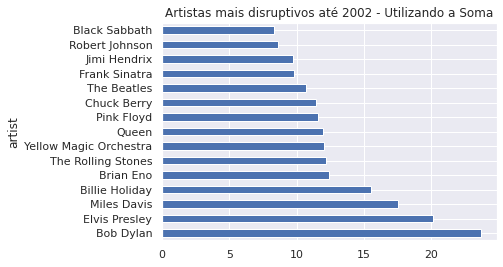

In [128]:
df_with_disruption.groupby(['artist'])['disruption'] \
    .agg(['sum', 'count', 'mean']).query("count >= 6") \
    .sort_values(by=['sum'], ascending=False)["sum"][:15].plot.barh() \
    .set_title("Artistas mais disruptivos até 2002 - Utilizando a Soma")

## Artistas mais consolidadores (utilizando a média)

In [130]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['mean'], ascending=False)[-15:]

,sum,count,mean
artist,,,
Exodus,-0.297477,14,-0.021248
Vangelis,-0.293337,13,-0.022564
Nick Cave & The Bad Seeds,-1.175547,50,-0.023511
Aqua,-0.357647,14,-0.025546
New York Dolls,-0.285318,11,-0.025938
Aaliyah,-0.156224,6,-0.026037
Steppenwolf,-0.217090,8,-0.027136
Kent,-0.546419,17,-0.032142
Eurythmics,-0.714285,19,-0.037594


Text(0.5, 1.0, 'Artistas mais consolidadores até 2002 - Utilizando a Média')

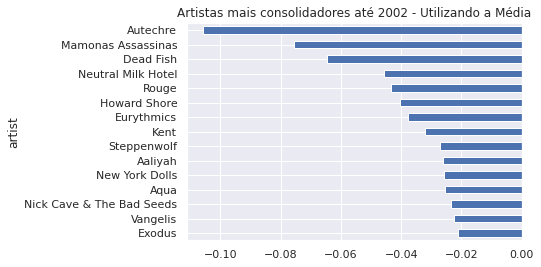

In [132]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['mean'], ascending=False)["mean"][-15:].plot.barh().set_title("Artistas mais consolidadores até 2002 - Utilizando a Média")

Artistas de um estilo músical inovador (como no caso do rock cômico dos mamonas assassinas) nas letras ou na mistura de gêneros bem estabelecidos não são identificados como artistas disruptivos por este modelo.

Mamonas Assassinas:

- Anteriormente chamada de Utopia, foi uma banda brasileira de rock cômico formada em Guarulhos em 1989. Seu som consistia numa mistura de pop rock com influências de gêneros populares, tais como sertanejo, brega, heavy metal, pagode romântico, forró, música mexicana e vira.

## Artistas mais consolidadores (utilizando a soma)

In [133]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['sum'], ascending=False)[-15:]

,sum,count,mean
artist,,,
Rouge,-0.347719,8,-0.043465
Aqua,-0.357647,14,-0.025546
The Smashing Pumpkins,-0.392899,77,-0.005103
Jorge Ben,-0.435378,35,-0.012439
Iron Maiden,-0.504393,118,-0.004275
Dead Fish,-0.516394,8,-0.064549
Bolt Thrower,-0.542904,37,-0.014673
Kent,-0.546419,17,-0.032142
Mamonas Assassinas,-0.681337,9,-0.075704


Text(0.5, 1.0, 'Artistas mais consolidadores até 2002 - Utilizando a Soma')

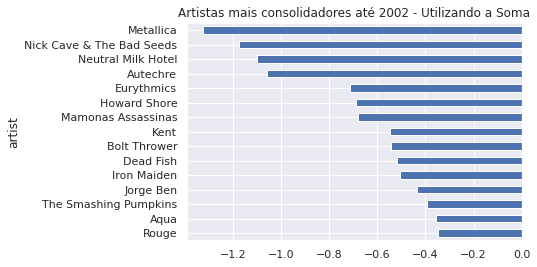

In [134]:
df_with_disruption.groupby(['artist'])['disruption'].agg(['sum', 'count', 'mean']).query("count >= 6").sort_values(by=['sum'], ascending=False)["sum"][-15:].plot.barh().set_title("Artistas mais consolidadores até 2002 - Utilizando a Soma")

## Músicas mais disruptivas

In [14]:
df_with_disruption.sort_values(["disruption", "ni"], ascending=False)[["artist", "song", "disruption", "ni", "nj", "nk", "popularity", "release"]][:15]

,artist,song,disruption,ni,nj,nk,popularity,release
167,Chuck Berry,Together (We'll Always Be),1.0,639.0,0.0,0.0,10.0,1957
216,Jerry Lee Lewis,Crazy Arms,1.0,612.0,0.0,0.0,28.0,1958
178,Muddy Waters,I Just Want To Make Love To You,1.0,364.0,0.0,0.0,40.0,1957
375,The Moody Blues,Go Now!,1.0,341.0,0.0,0.0,45.0,1960
58,Dizzy Gillespie,Groovin' High,1.0,293.0,0.0,0.0,44.0,1955
906,Bob Dylan,Outlaw Blues,1.0,274.0,0.0,0.0,34.0,1965
537,The Beatles,Roll over Beethoven,1.0,261.0,0.0,0.0,56.0,1963
224,Billie Holiday,Glad to Be Unhappy,1.0,254.0,0.0,0.0,17.0,1958
162,Chuck Berry,School Day (Ring Ring Goes The Bell),1.0,239.0,0.0,0.0,41.0,1957
482,Roy Orbison,Pretty Woman,1.0,236.0,0.0,0.0,69.0,1962


## Correlação entre disrupção e outros atributos

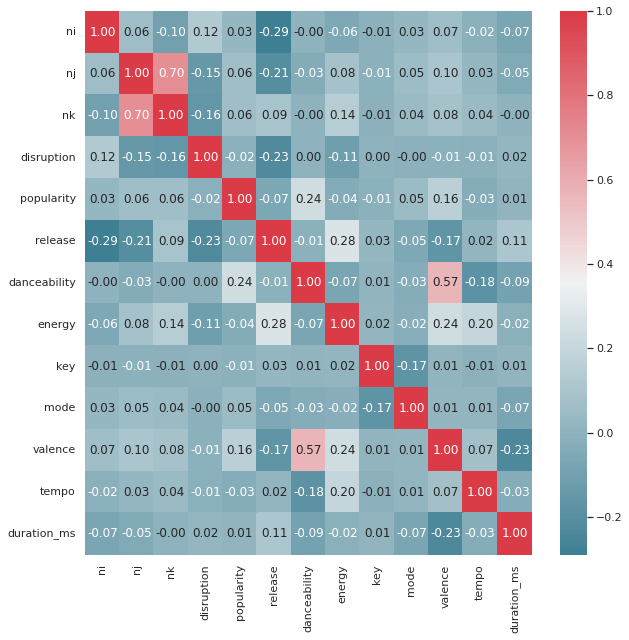

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

   # show plot
   plt.show()


heatMap(df_with_disruption, True)

Podemos ver uma correlação negativa quase moderada (-0.25) entre a disrupção e o ano, ou seja, músicas precursoras/antigas em seus respectivos estilos foram mais disruptivas.

Assim como a correlação negativa fraca com o $n_{j}$ e o $n_{k}$ faz sentido, já que ambos estão no denominador no cálculo da disrupção.

Há também interessantemente uma correlação fraca negativa em relação à energia da música. A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. 

Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto o prelúdio de Bach tem pontuação baixa nessa escala. 
As características perceptivas que contribuem para este atributo incluem gama dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

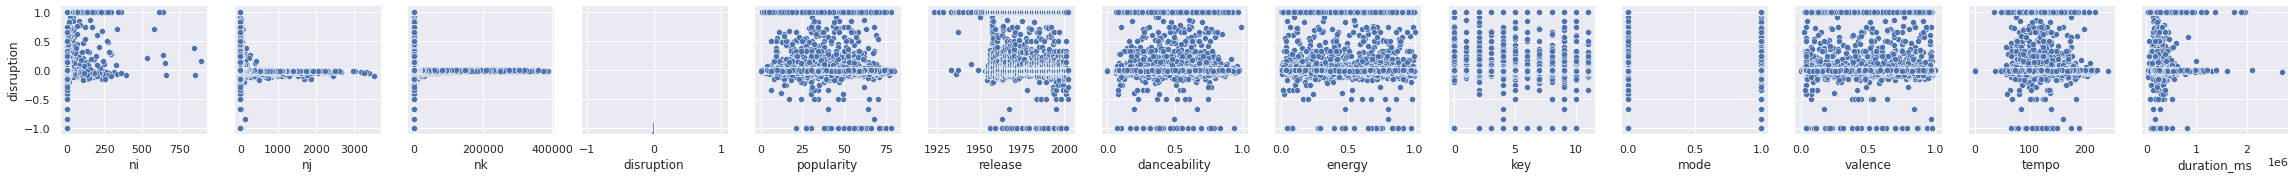

In [95]:
# Basic correlogram
sns.pairplot(df_with_disruption, y_vars=["disruption"])

# Correlação entre disrupção e gêneros musicais

Transformando lista de gêneros em colunas e binarizando os dados ( se possui o gênero será 1, caso contrário 0)

In [89]:
fewer_columns = df_with_disruption[["id", "artist", "song", "release", "disruption"]]
genres_as_columns = df_with_disruption['genres'].str.get_dummies(sep=',')
final = pd.concat([fewer_columns, genres_as_columns], axis=1)
final.head()

,id,artist,song,release,disruption,a cappella,abstract,accordion,acid house,acid jazz,...,visual kei,vocal house,vocal jazz,vocal trance,west coast rap,world,worship,yacht rock,yoga,zeuhl
0,oXEbiIPUippqpNjc,Bessie Smith,Nobody Knows You When You're Down and Out,1923,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,QjxUmiXnnXxYDt72,Fats Waller,Ain't Misbehavin',1926,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c94tTSauKXFhFJDI,Blind Willie Johnson,Let Your Light Shine On Me,1928,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3MEb9LZbB80nQ1a8,Louis Armstrong,St. James Infirmary,1928,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WmoFpVkLhArKSfrZ,Billie Holiday,These Foolish Things (Remind Me Of You),1933,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Usando a correlação de Pearson para descobrir se há uma correlação entre gênero e disrupção

In [18]:
genres_correlation_matrix = final.corr()
disruption_genres_pearson_corr = genres_correlation_matrix["disruption"].sort_values()
disruption_genres_pearson_corr = disruption_genres_pearson_corr[:] # -1 Removes the correlation with itself


### Gêneros mais consolidadores

<AxesSubplot:>

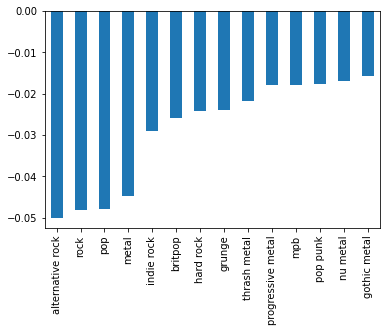

In [22]:
consolidating_genres = disruption_genres_pearson_corr[1:15] # 1: removing release column
consolidating_genres.plot.bar()

### Gêneros mais disruptivos

<AxesSubplot:>

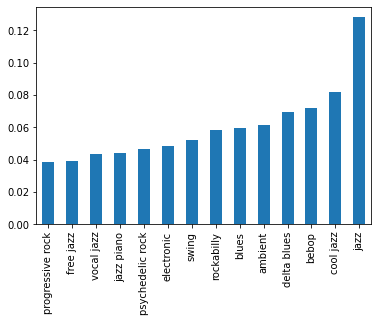

In [24]:
disruptive_genres    = disruption_genres_pearson_corr[-15:-1] # -1 remove disruption correlation with itself
disruptive_genres.plot.bar()

## Há gêneros que possuem uma correlação maior ou menor (apesar de serem todas pequenas ou pouco significantes). 
Sendo interessante a maior correlação ser uma correlação fraca de 0.12 com o jazz, o que faz sentido, já que é um gênero musical que se reinventou ao longo dos anos

In [79]:
df_with_disruption[df_with_disruption.artist.str.contains("(?i)smash mouth")].sort_values(by=["disruption", "ni"], ascending=False)[:15]

,id,ni,nj,nk,disruption,artist,song,album_name,genres,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
24627,1Sns0XplC2oR55TE,0.0,70.0,74271.0,-0.000942,Smash Mouth,I'm A Believer - Soundtrack Version,Shrek,"rock,classic rock,soundtrack,hard rock,glam rock",0mBL2JwjNYKtdFacHxvtJt,48.0,2001,0.515,0.980,6.0,1.0,0.933,164.698,185760
25514,Xephqw2Ks2oBpjIU,0.0,70.0,64476.0,-0.001084,Smash Mouth,Pacific Coast Party,Smash Mouth,"rock,alternative rock",6PVUhaicHVxBFjOUDcWfDY,33.0,2001,0.659,0.880,5.0,0.0,0.864,122.193,178880
24766,Sj1KEAMrWROidFTr,0.0,80.0,72174.0,-0.001107,Smash Mouth,I'm a Believer,Smash Mouth,"rock,soundtrack,pop",1RC5Mb0VhnlhnMlFDnrvE0,60.0,2001,0.562,0.967,6.0,1.0,0.869,82.388,183400
22706,aztQptXGGa1rvEJz,0.0,141.0,114026.0,-0.001235,Smash Mouth,Then The Morning Comes,Astro Lounge,"rock,pop",50MfV7a1pnOEcf2t9kobxW,43.0,1999,0.736,0.868,5.0,0.0,0.961,118.599,182267
20177,rglTVcA0A94iRTqO,0.0,303.0,217026.0,-0.001394,Smash Mouth,Walkin' On The Sun,Fush Yu Mang (20th Anniversary Edition),"rock,alternative rock,pop",4TQeNHx85xcP9YRkvJC6K1,62.0,1997,0.745,0.972,6.0,1.0,0.968,123.067,207787
20008,nJvkT2yeDbRzKjVG,0.0,461.0,254623.0,-0.001807,Smash Mouth,Why Can't We Be Friends,Fush Yu Mang (20th Anniversary Edition),"ska,rock",36xIOmGAoanZWR0kAFKRNO,48.0,1997,0.447,0.900,8.0,1.0,0.707,100.308,287933
21954,Lps2nY7wJhof8WRL,0.0,348.0,147346.0,-0.002356,Smash Mouth,Can't Get Enough of You Baby,Astro Lounge,"rock,soundtrack,pop,pop rock",0UVIXwqfTjefBbDyY60MWB,49.0,1999,0.669,0.900,6.0,1.0,0.885,123.716,150773
21889,9ze5AULDHxoRO9ag,0.0,479.0,189646.0,-0.002519,Smash Mouth,Stoned,Astro Lounge,"pop,rock,alternative rock",7bFstEkOysInloEcaHzMUM,39.0,1999,0.621,0.802,11.0,1.0,0.580,167.542,248293
21901,72LfFbRbd83fiTz3,0.0,618.0,213163.0,-0.002891,Smash Mouth,Waste,Astro Lounge,rock,2Wo9IRlgSTeQs76VuuYnpw,38.0,1999,0.601,0.810,10.0,0.0,0.533,88.669,205200
22246,3epXIjVSRaVtuJ9Y,0.0,37.0,12576.0,-0.002933,Smash Mouth,Diggin' Your Scene,Astro Lounge,"rock,pop",5VL3c4UjMFR8BcPqoFVTNc,31.0,1999,0.570,0.962,6.0,0.0,0.962,143.053,189093


In [48]:
def num_of_genres(df):
    genres = ",".join(df['genres']).split(",")
    # That way we can count the occurrences of all genres in the dataframe
    genres_series = pd.Series(genres)
    unique_ones = genres_series.unique()
    rock = sum('rock' in s for s in unique_ones)
    pop = sum('pop' in s for s in unique_ones)
    jazz = sum('jazz' in s for s in unique_ones)
    print(f"Number of Rock Pop Jazz related Tags {rock, pop, jazz}")
    print(f"Number of unique genres in the dataset: {genres_series.nunique()}")

num_of_genres(df_with_disruption)
num_of_genres(datasets["id_genres"][:30000])
num_of_genres(datasets["id_genres"])

Number of Rock Pop Jazz related Tags (54, 43, 22)
Number of unique genres in the dataset: 460
Number of Rock Pop Jazz related Tags (67, 68, 23)
Number of unique genres in the dataset: 665
Number of Rock Pop Jazz related Tags (75, 79, 30)
Number of unique genres in the dataset: 853


In [ ]:
listening_history = datasets["listening_history"].copy(deep=True)
listening_history.head()

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09


In [ ]:
listening_history.describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_Vrd41io2,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [56]:
all_users_history = listening_history.copy(deep=True)
all_users_history["timestamp"] = pd.to_datetime(all_users_history["timestamp"])

In [48]:
user_history = listening_history.query("user == 'user_007XIjOr'").sort_values(by=["timestamp"])

In [49]:
user_history["timestamp"] = pd.to_datetime(user_history["timestamp"])

In [50]:
user_history["time_diff"] = user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)

In [51]:
print(user_history.to_string())

              user              song           timestamp  time_diff
0    user_007XIjOr  DaTQ53TUmfP93FSr 2019-02-20 12:28:00        0.0
1    user_007XIjOr  dGeyvi5WCOjDU7da 2019-02-20 12:35:00        7.0
2    user_007XIjOr  qUm54NYOjeFhmKYx 2019-02-20 12:48:00       13.0
3    user_007XIjOr  FtnuMT1DlevSR2n5 2019-02-20 12:52:00        4.0
4    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:09:00       17.0
5    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:13:00        4.0
6    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:33:00       20.0
7    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:39:00        6.0
8    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:45:00        6.0
9    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:51:00        6.0
10   user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:58:00        7.0
11   user_007XIjOr  QDtAFWCvEaRwFPnC 2019-02-20 14:15:00       17.0
12   user_007XIjOr  MFVaxfkxZAUc4C8U 2019-02-20 14:20:00        5.0
13   user_007XIjOr  DhLocRBlCrB5ikDO 2019-02-20 

In [62]:
def get_cdf(df, field='time_diff'):
    res = {}
    for quantile in np.arange(0.0, 1,0.0005):
        res[quantile] = df[field].quantile(quantile)
    res_series = pd.DataFrame(pd.Series(res)).reset_index().set_index(0)
    return res_series

## Entendendo quanto tempo é uma sessão do usuário

<AxesSubplot:xlabel='0'>

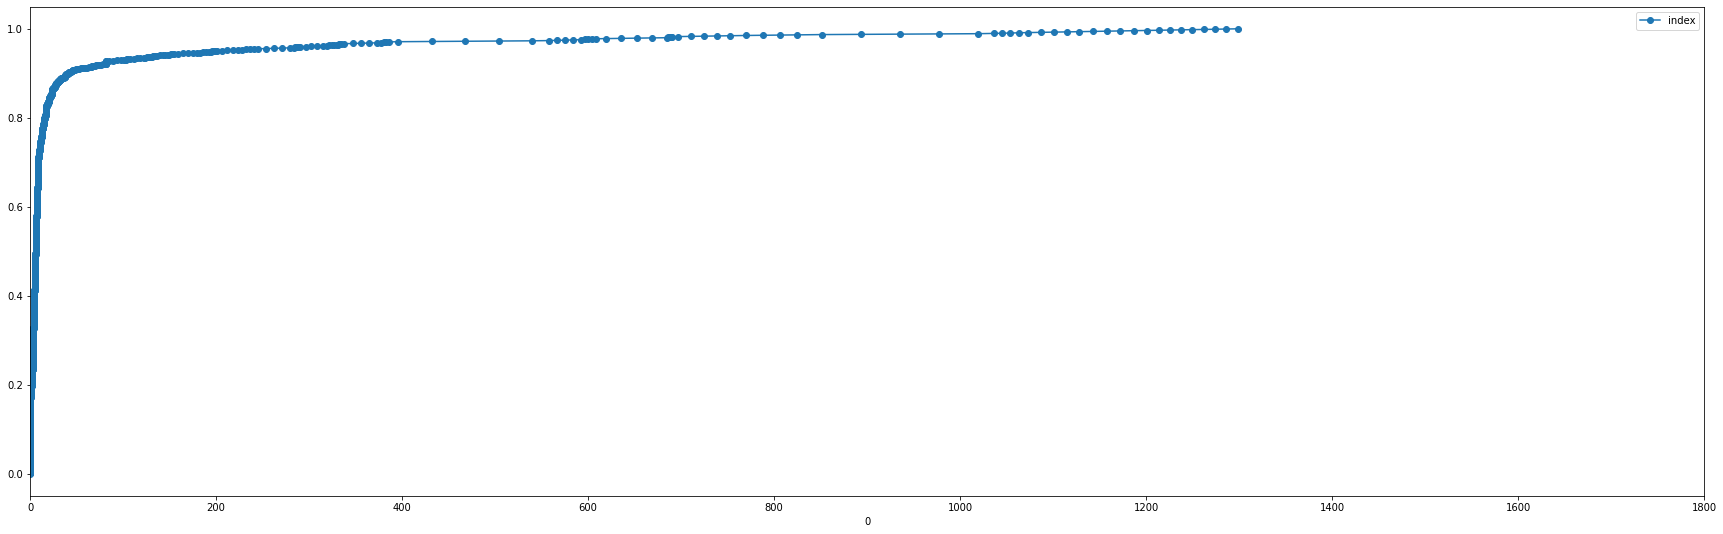

In [53]:
time_diff.plot(marker='o', figsize=(30,9), xlim=(0,1800))

In [57]:
sorted_user_history = all_users_history.sort_values(by=["user", "timestamp"])
sorted_user_history["new_user"] = sorted_user_history.user != sorted_user_history.user.shift()
sorted_user_history["time_diff"] = sorted_user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)
sorted_user_history.loc[sorted_user_history.new_user] = None

In [60]:
sorted_user_history.dropna()

,user,song,timestamp,new_user,time_diff
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35:00,0.0,7.0
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48:00,0.0,13.0
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52:00,0.0,4.0
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09:00,0.0,17.0
5,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:13:00,0.0,4.0
...,...,...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57:00,0.0,9.0
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21:00,0.0,24.0
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48:00,0.0,27.0
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13:00,0.0,265.0


In [63]:
time_diff_all_users = get_cdf(sorted_user_history)

<AxesSubplot:xlabel='0'>

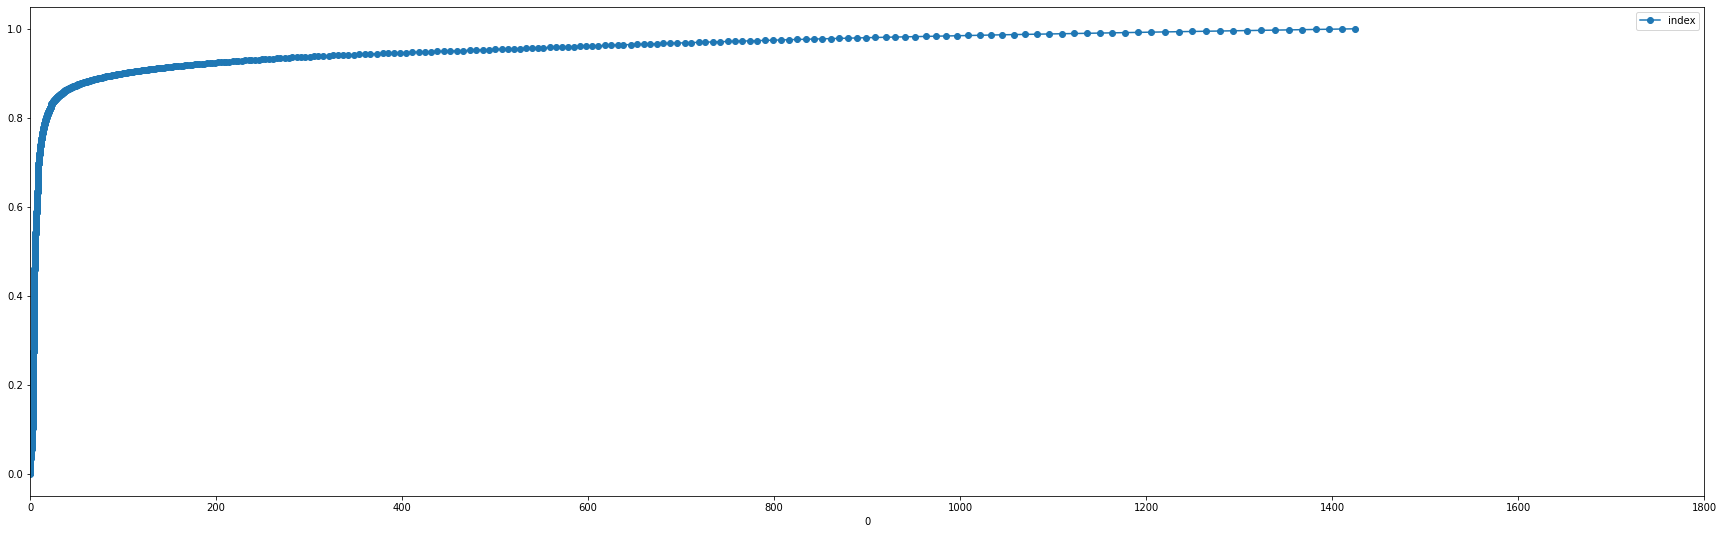

In [64]:
time_diff_all_users.plot(marker='o', figsize=(30,9), xlim=(0,1800))